# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.109925e+01     6.226450e+00
 * time: 0.0049169063568115234
     1     2.840334e+01     6.747968e+00
 * time: 0.015069007873535156
     2     2.474957e+01     9.849575e+00
 * time: 0.0393071174621582
     3     1.485356e+01     3.310294e+00
 * time: 0.06894302368164062
     4     1.167391e+01     1.512959e+00
 * time: 0.09205007553100586
     5     1.071879e+01     1.110202e+00
 * time: 0.11597990989685059
     6     1.009204e+01     2.026479e+00
 * time: 0.13480091094970703
     7     9.671095e+00     6.818384e-01
 * time: 0.1537950038909912
     8     9.486492e+00     4.778327e-01
 * time: 0.17256498336791992
     9     9.399643e+00     1.094617e+00
 * time: 0.18714213371276855
    10     9.310191e+00     9.680567e-01
 * time: 0.20177102088928223
    11     9.196602e+00     4.936379e-01
 * time: 0.22127509117126465
    12     9.164526e+00     1.255122e+00
 * time: 0.2360830307006836
    13     9.079375e+00     5.543582e-01
 * time:

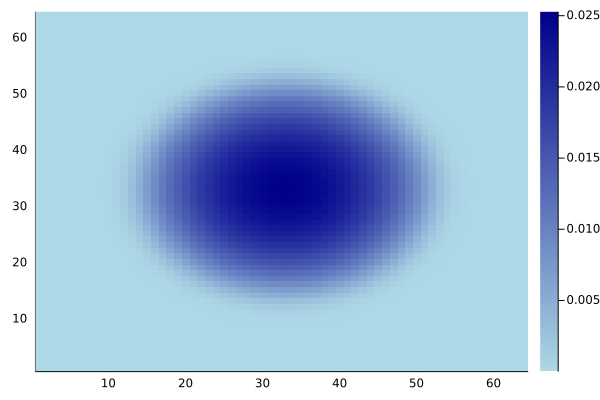

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)